In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wasserstein_distance

In [ ]:
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-white')

In [4]:
def plot_histogram(dataset, sep=" "):
    data = pd.read_csv(dataset + '/out_community.txt', sep=sep, skiprows=1, names=["Node", "Com"])
    data['Com'] = data['Com'].values.astype(str)
    data["Com"].replace({"0": "Blue", "1": "Red"}, inplace=True)
    rpgrank = pd.read_csv(dataset + "/red_absorbing_probabilities.csv", sep=",", skiprows=1, names=["Node", "RP"])
    result = rpgrank.join(data.set_index('Node'), on="Node")
    x1 = result.loc[result.Com=='Blue', 'RP']
    x2 = result.loc[result.Com=='Red', 'RP']
    kwargs = dict(alpha=0.5, bins=10)
    plt.hist(x1, **kwargs, color='darkblue', label='Blue', linewidth=0.5)
    plt.hist(x2, **kwargs, color='maroon', label='Red', linewidth=0.5)
    plt.xlim(0,1)
    plt.legend(fontsize=30)
    plt.legend(frameon=True)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Red Ratio', fontsize=18)
    plt.ylabel('Count', fontsize=18)
#     plt.show()|
    plt.savefig("figures/" + dataset + "_histogram.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


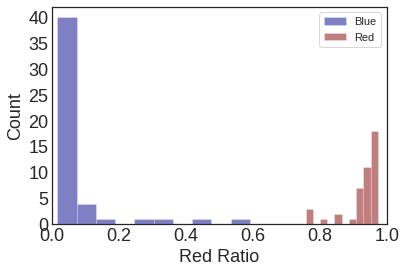

In [3]:
plot_histogram("books")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


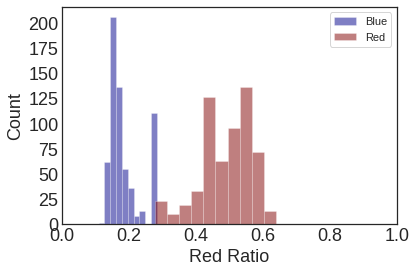

In [4]:
plot_histogram("blogs", sep="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


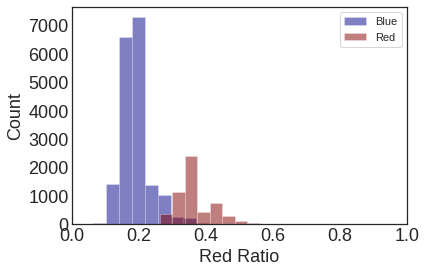

In [5]:
plot_histogram("dblp_new_pubs", sep="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


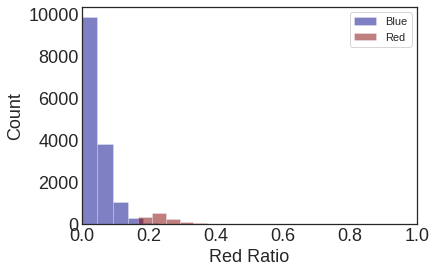

In [6]:
plot_histogram("dblp_pub_5", sep="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


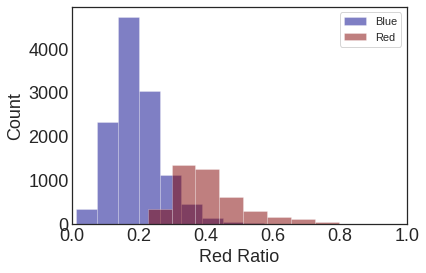

In [7]:
plot_histogram("dblp_genre_5", sep="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


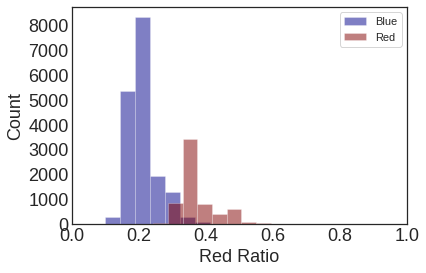

In [8]:
plot_histogram("dblp_new_gender", sep="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


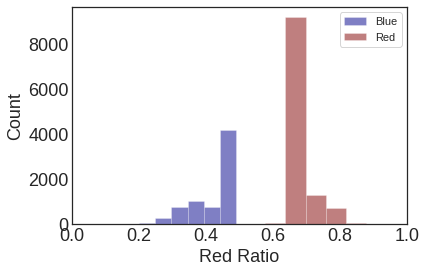

In [9]:
plot_histogram("twitter")

In [5]:
def plot_violin(dataset, separator=" ", our_algo=True):
    data = pd.read_csv(dataset + '/out_community.txt', sep=separator, skiprows=1, names=["Node", "Com"])
    data['Com'] = data['Com'].values.astype(str)
    data["Com"].replace({"0": "Blue", "1": "Red"}, inplace=True)
    frames = None
    if our_algo:
        df_fair = pd.read_csv(dataset + "/sc_personalized_fair.csv_round_9.csv" , sep="\t")
        df_efrec = pd.read_csv(dataset + "/sc_personalized_hybrid_node2vec.csv_round_9.csv" , sep="\t")
        df_prec = pd.read_csv(dataset + "/sc_personalized_dyadic_fair.csv_round_9.csv" , sep="\t")
        df_eprec = pd.read_csv(dataset + "/sc_personalized_hybrid_balanced_node2vec.csv_round_9.csv" , sep="\t")
        df_n2v = pd.read_csv(dataset + "/sc_personalized_node2vec.csv_round_9.csv" , sep="\t")
        df_fw = pd.read_csv(dataset + "/sc_personalized_fairwalk.csv_round_9.csv" , sep="\t")
        df_fair.insert(0, 'Algorithm', 'FREC')
        df_efrec.insert(0, 'Algorithm', 'E_FREC')
        df_prec.insert(0, 'Algorithm', 'PREC')
        df_eprec.insert(0, 'Algorithm', 'E_PREC')
        df_n2v.insert(0, 'Algorithm', 'n2v')
        df_fw.insert(0, 'Algorithm', 'FairWalk')
        frames = [df_fair, df_efrec, df_prec, df_eprec, df_n2v, df_fw]
    else:
        df_pref = pd.read_csv(dataset + "/sc_personalized_preferential_attachment.csv_round_9.csv" , sep="\t")
        df_jac = pd.read_csv(dataset + "/sc_personalized_jaccard_coefficient.csv_round_9.csv" , sep="\t")
        df_ad = pd.read_csv(dataset + "/sc_personalized_adamic_adar.csv_round_9.csv" , sep="\t")
        df_n2v = pd.read_csv(dataset + "/sc_personalized_node2vec.csv_round_9.csv" , sep="\t")
        df_r = pd.read_csv(dataset + "/sc_personalized_random.csv_round_9.csv" , sep="\t")
        df_pref.insert(0, 'Algorithm', 'PA')
        df_jac.insert(0, 'Algorithm', 'JC')
        df_ad.insert(0, 'Algorithm', 'ADA')
        df_n2v.insert(0, 'Algorithm', 'n2v')
        df_r.insert(0, 'Algorithm', 'Rnd')
        frames = [df_pref, df_jac, df_ad, df_n2v, df_r]
    for f in frames:
        f.rename(columns={"Red Personalized Pagerank": "Personalized Distribution"}, inplace=True)
    result = pd.concat(frames)
    result = result.join(data.set_index('Node'), on="Node")
    my_pal = {Com: "r" if Com == "Red" else "b" for Com in result["Com"].unique()}
    sns.violinplot(hue="Com", x='Algorithm', y="Personalized Distribution", 
                   palette=my_pal, split=True, data=result, linewidth=1, hue_order= ["Blue", "Red"])
    plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend('', frameon=False)
    plt.xlabel('Algorithm', fontsize=15)
    plt.ylabel('Personalized Distribution', fontsize=15)
#     plt.show()
    tmp = "_our_algo" if our_algo else "_rec"
    plt.savefig("figures/" + dataset + "_violin" + tmp + ".png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

def plot_violin_all_datasets(datasets, separator=" "):
    dfs = []
    names = {"blogs": "BLOGS", "twitter": "TWITTER", "dblp_new_gender": "DBLP_GENDER", "books": "BOOKS",
            "dblp_new_pubs": "DBLP_PUB"}
    for dataset in datasets:
        df = pd.read_csv(dataset + "/sc_personalized_fair.csv_round_-1.csv" , sep="\t")
        df.insert(0, 'Dataset', names[dataset])
        dfs.append(df)
    frames = dfs
    result = pd.concat(frames)
    try:
        while True:
            data = pd.read_csv(dataset + '/out_community.txt', sep=separator, skiprows=1, names=["Node", "Com"])
            data['Com'] = data['Com'].values.astype(str)
            data["Com"].replace({"0": "Blue", "1": "Red"}, inplace=True)
            result = result.join(data.set_index('Node'), on="Node")
            break
    except Exception:
        separator = "\t"
    my_pal = {Com: "r" if Com == "Red" else "b" for Com in result["Com"].unique()}
    plt.figure(figsize=(8,4)) # this creates a figure 8 inch wide, 4 inch high
    sns.violinplot(hue="Com", x='Dataset', y="Red Personalized Pagerank", 
                   palette=my_pal, split=True, data=result, linewidth=1, hue_order= ["Blue", "Red"])
    plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.show()

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


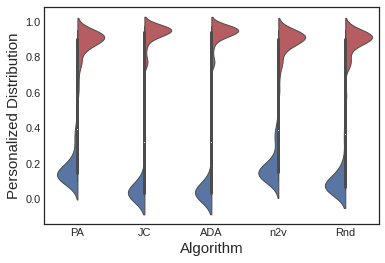

In [11]:
plot_violin("books", our_algo=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


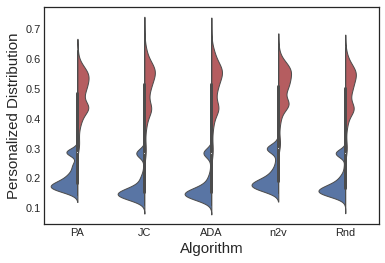

In [12]:
plot_violin("blogs", separator="\t", our_algo=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


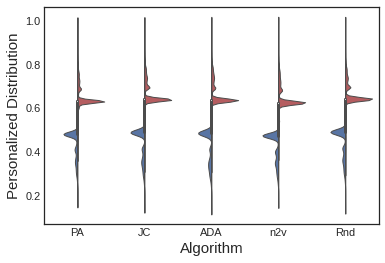

In [13]:
plot_violin("twitter", our_algo=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


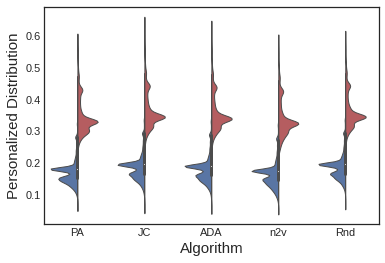

In [14]:
plot_violin("dblp_new_pubs", separator="\t", our_algo=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


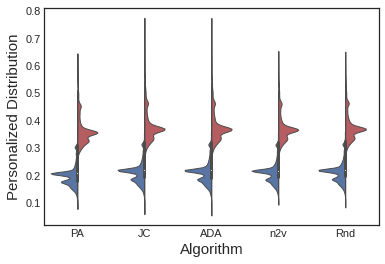

In [15]:
plot_violin("dblp_new_gender", separator="\t", our_algo=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


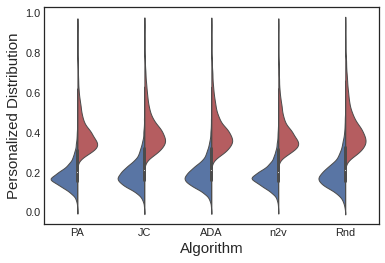

In [16]:
plot_violin("dblp_genre_5", separator="\t", our_algo=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


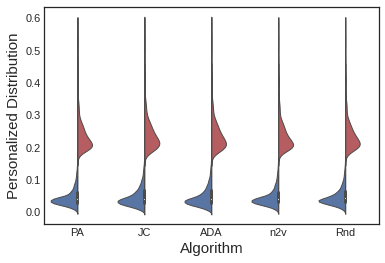

In [17]:
plot_violin("dblp_pub_5", separator="\t", our_algo=False)

## Our Algorithms

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


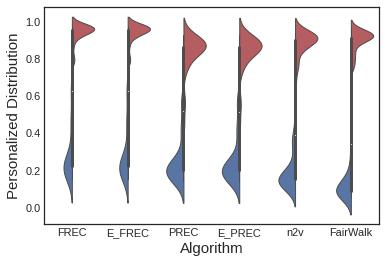

In [18]:
plot_violin("books")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


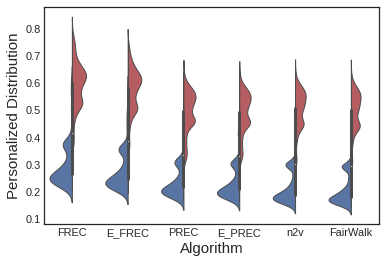

In [19]:
plot_violin("blogs", separator="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


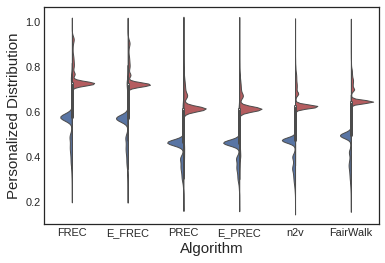

In [20]:
plot_violin("twitter")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


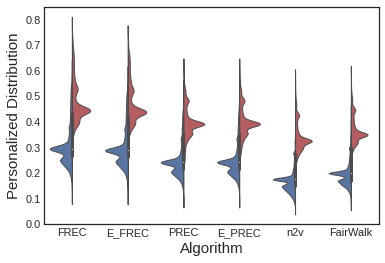

In [21]:
plot_violin("dblp_new_pubs", separator="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


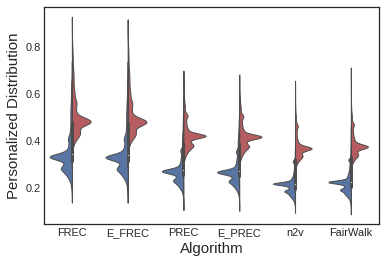

In [22]:
plot_violin("dblp_new_gender", separator="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


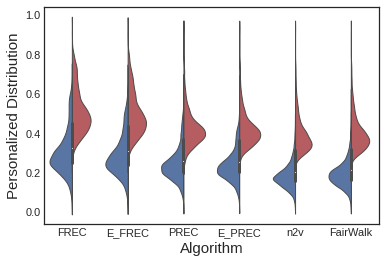

In [23]:
plot_violin("dblp_genre_5", separator="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


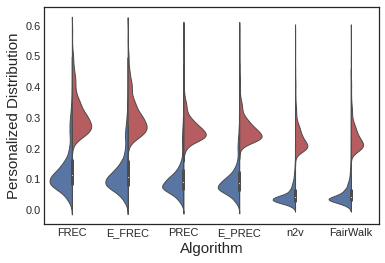

In [24]:
plot_violin("dblp_pub_5", separator="\t")

In [2]:
def plot_personalized_dist(dataset, algorithm):
    distribution_distance = list()
    file_prefix = f"sc_personalized_{algorithm}.csv_round_"
    try:
        cat = pd.read_csv(f"{dataset}/out_community.txt", sep=" ", names=["Node", "Cat"], header=0)
    except:
        cat = pd.read_csv(f"{dataset}/out_community.txt", sep="\t", names=["Node", "Cat"], header=0)
    df = pd.read_csv(dataset + "/" + file_prefix + "-1.csv", sep="\t")
    fair_ratio = pd.read_csv("books/sc_personalized_fairwalk.csv_round_-1.csv", sep="\t")["Red Personalized Pagerank"].mean()
    df = df.merge(cat, how="inner", on="Node")
    df["round"] = 0
    fair_ratio = pd.read_csv("books/sc_personalized_fairwalk.csv_round_-1.csv", sep="\t")["Red Personalized Pagerank"].mean()
    temp_red = df.loc[df["Cat"] == 1]["Red Personalized Pagerank"]
    temp_blue = df.loc[df["Cat"] == 0]["Red Personalized Pagerank"]
    distribution_distance.append(wasserstein_distance(temp_red, temp_blue))
    for round in range(10):
        temp_df = pd.read_csv(dataset + "/" + file_prefix + f"{round}.csv", sep="\t")
        temp_df = temp_df.merge(cat, how="inner", on="Node")
        temp_red = temp_df.loc[temp_df["Cat"] == 1]["Red Personalized Pagerank"]
        temp_blue = temp_df.loc[temp_df["Cat"] == 0]["Red Personalized Pagerank"]
        distribution_distance.append(wasserstein_distance(temp_red, temp_blue))
        temp_df["round"] = round + 1
        df = df.append(temp_df)
        
#     fig = plt.figure(figsize=(15, 8))#)
    
#     my_pal = {Cat: "r" if Cat == 1 else 'b' for Cat in df["Cat"].unique()}
# #     fig.suptitle(f"Dataset: {dataset} | Algorithm: {algorithm}")
#     sns.violinplot(x="round", y="Red Personalized Pagerank", hue="Cat", 
#                    palette=my_pal, hue_order=[0, 1], data=df, split=True)
#     plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
#     plt.legend('', frameon=False)
# #     plt.ylim(0, 1.0)
#     plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
#                    ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], 
#                    fontsize=20)
#     plt.yticks(fontsize=20)
#     plt.ylabel('Personalized Distribution', fontsize=20)
#     plt.xlabel('Round', fontsize=20)
#     plt.savefig(f"figures/{dataset}_violin_round_{algorithm}.png", dpi=None, 
#                 facecolor='w', edgecolor='w', orientation='portrait', papertype=None, 
#                 format=None, transparent=False, bbox_inches="tight", pad_inches=0.1,
#                 frameon=None, metadata=None)
    return distribution_distance

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


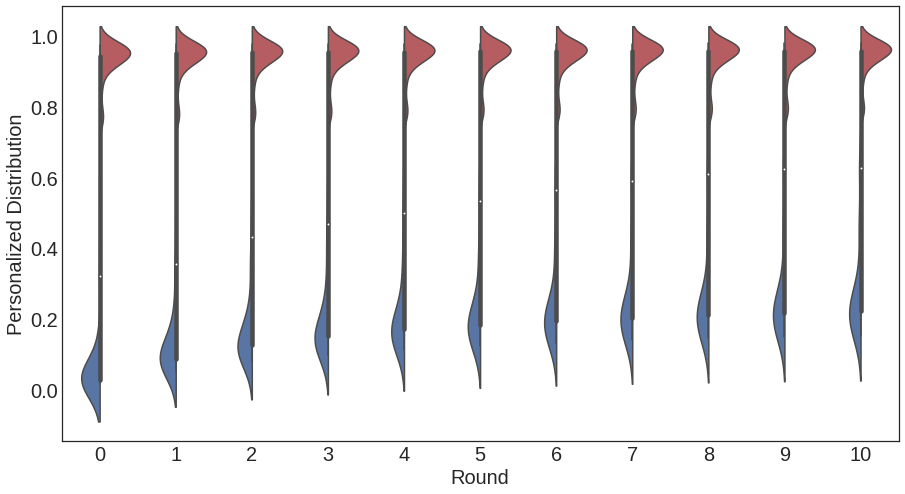

In [72]:
res = plot_personalized_dist("books", "fair")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


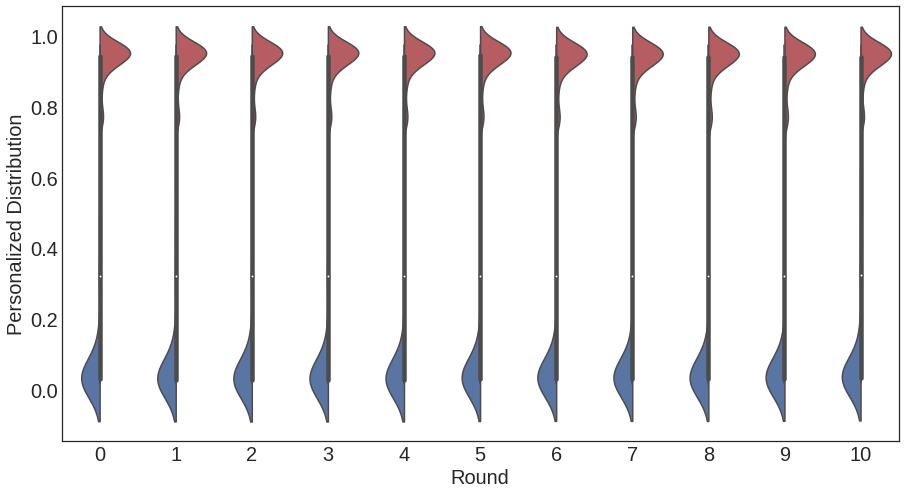

In [73]:
res = plot_personalized_dist("books", "jaccard_coefficient")

In [28]:
# res = plot_personalized_dist("blogs", "fair")

In [29]:
# res = plot_personalized_dist("blogs", "dyadic_fair")

In [30]:
# res = plot_personalized_dist("twitter", "hybrid_balanced_node2vec")

In [115]:
# dist_dist

In [21]:
datasets = ["books", "blogs", "dblp_genre_5", "dblp_pub_5", "twitter"]
markers = ["s","o", "D", "*", "X", "^", "p"]
# algorithm = ["fair", "dyadic_fair", "hybrid_node2vec", "hybrid_balanced_node2vec",
#              "preferential_attachment", "jaccard_coefficient", "adamic_adar",
#              "node2vec", "fairwalk", "random"]
algorithm = ["fair", "dyadic_fair", "hybrid_node2vec", "hybrid_balanced_node2vec",
             "node2vec", "fairwalk", "random"]
data = {'FREC': [], 'PREC': [], 'E_FREC': [], 'E_PREC': [],
        'PA': [], 'JC': [], 'ADA': [],
        'n2v': [], 'FairWalk': [], 'Random': []}
name = ['FREC', 'PREC', 'E_FREC', 'E_PREC', 'n2v', 'FairWalk', 'Random']
WRITE_TO_FILE = True
DISABLE_LEGEND = True
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter

class ScalarFormatterClass(ScalarFormatter):
    def _set_format(self):
        self.format = "%0.2f"
# name = ['FREC', 'PREC', 'E_FREC', 'E_PREC', 'PA', 'JC', 'ADA', 'n2v', 'FairWalk', 'Random']
def wasserstein_plot(dataset):
    i = 0
    dist_dist = dict()
    for a in algorithm:
        dist_dist[name[i]] = plot_personalized_dist(dataset, a)
        i+=1
    dist_dist = pd.DataFrame.from_dict(dist_dist)
    ax = plt.gca()
    yScalarFormatter = ScalarFormatterClass(useMathText=True)
    ax.yaxis.set_major_formatter(yScalarFormatter)
    for i in range(len(name)):
        plt.plot(dist_dist.index.values, dist_dist[name[i]], label=name[i], linestyle=':', 
                 marker=markers[i], ms=10)    
    plt.ylabel('Distance', fontsize=18)
    plt.xlabel('Round', fontsize=18)
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], 
                       fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 7)
    if DISABLE_LEGEND:
        plt.legend('', frameon=False)
    if WRITE_TO_FILE:
        plt.savefig("figures/" + dataset + "_wasserstein.png", dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches='tight', pad_inches=0.1,
            frameon=None, metadata=None)

In [15]:
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-white')

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


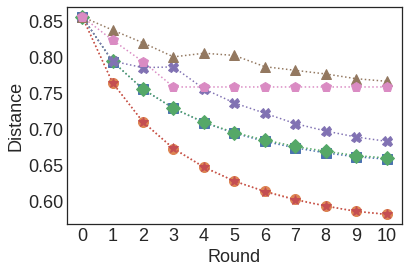

In [16]:
wasserstein_plot("books")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


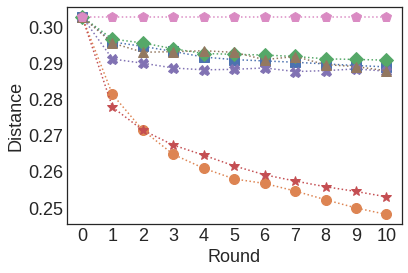

In [17]:
wasserstein_plot("blogs")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


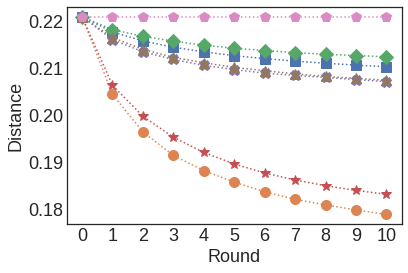

In [18]:
wasserstein_plot("dblp_genre_5")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


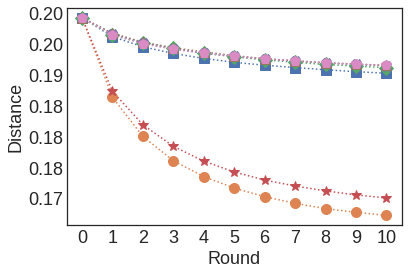

In [19]:
wasserstein_plot("dblp_pub_5")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


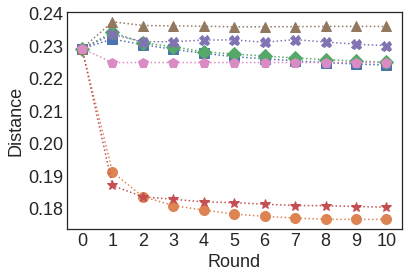

In [20]:
wasserstein_plot("twitter")

In [65]:
for k, v in data.items():
    tmp = []
    for i in v:
        tmp.append(i[0])
    data[k] = tmp
print(data)

{'FREC': [0.6581827707641196, 0.2889072008702483, 0.2102368995990322, 0.19021953349805057, 0.22398008030794342], 'PREC': [0.5812542971048884, 0.24818507784513014, 0.17886004426587418, 0.16719316384276067, 0.17645882659175716], 'E_FREC': [0.6598295301376365, 0.2907697608988812, 0.21235579523129175, 0.19112989653042042, 0.22486576691635468], 'E_PREC': [0.5814623597532036, 0.25304384225878496, 0.18312453870683737, 0.17000802854430033, 0.18023212219364024], 'PA': [0.6934050450878025, 0.2760075754523495, 0.20705431938043267, 0.1913852973370441, 0.22503715897133125], 'JC': [0.8520742108685334, 0.32170998291139075, 0.2137075697381508, 0.19425012425965527, 0.24339087045911467], 'ADA': [0.8501463636449929, 0.3221016737641321, 0.21262950519535934, 0.1936716742236376, 0.24902861043843777], 'n2v': [0.6829965268153774, 0.287709381678673, 0.20707755134550954, 0.1914595897585562, 0.2299327708086902], 'FairWalk': [0.7664720252966303, 0.2878395601224675, 0.20738037512969618, 0.1914766203546812, 0.23586

In [66]:
df = pd.DataFrame.from_dict(data, orient='index',
 columns=['BOOKS', 'BLOGS', 'DBLP_GENDER', "DBLP_PUB", "TWITTER"])
df.to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n{} &     BOOKS &     BLOGS &  DBLP\\_GENDER &  DBLP\\_PUB &   TWITTER \\\\\n\\midrule\nFREC     &  0.658183 &  0.288907 &     0.210237 &  0.190220 &  0.223980 \\\\\nPREC     &  0.581254 &  0.248185 &     0.178860 &  0.167193 &  0.176459 \\\\\nE\\_FREC   &  0.659830 &  0.290770 &     0.212356 &  0.191130 &  0.224866 \\\\\nE\\_PREC   &  0.581462 &  0.253044 &     0.183125 &  0.170008 &  0.180232 \\\\\nPA       &  0.693405 &  0.276008 &     0.207054 &  0.191385 &  0.225037 \\\\\nJC       &  0.852074 &  0.321710 &     0.213708 &  0.194250 &  0.243391 \\\\\nADA      &  0.850146 &  0.322102 &     0.212630 &  0.193672 &  0.249029 \\\\\nn2v      &  0.682997 &  0.287709 &     0.207078 &  0.191460 &  0.229933 \\\\\nFairWalk &  0.766472 &  0.287840 &     0.207380 &  0.191477 &  0.235866 \\\\\nRandom   &  0.758553 &  0.302743 &     0.220853 &  0.191537 &  0.224750 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
data